In [1]:
from google.colab import drive
drive.mount('/content/drive')
% cd '/content/drive/My Drive/freq_bias'

Mounted at /content/drive
/content/drive/My Drive/freq_bias


In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import csv
import pickle


from PIL import Image
from matplotlib import pyplot as plt


In [48]:
# colors = ['b', 'g', 'r', 'k', 'm', 'c', 'y']
colors = ['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f', '#feeb9d', '#fffebe', 
'#f0f9a7', '#d8ef9b', '#b3e0a2', '#89d0a4', '#60bba8', '#3f97b7', '#4273b3']

In [4]:
def complexe_modulo(z):    
    a = z.real
    b = z.imag
    return np.sqrt(a**2+b**2)
    
def get_fourier(img):
    image_sample = np.fft.fft2(img)
    F_orig1 = np.fft.fftshift(image_sample)
    return F_orig1

def display_fourier(f):
    F_orig2 = np.log(complexe_modulo(f))
    return F_orig2

def inverse_fft(s):
  fft_img_mod = np.fft.ifftshift(s)
  img_mod = np.fft.ifft2(fft_img_mod)
  img_mod = img_mod.real

  return img_mod

In [ ]:
ori1 = np.load("attack_perturbation/race/Fairface_layer0_3_layerall_3_att_1/East Asian_race_trial1.npy")
ori1 = np.mean(ori1[0], axis=0)

ori2 = np.load("attack_perturbation/race/Fairface_layer0_7_layerall_3_att_1/East Asian_race_trial1.npy")
ori2 = np.mean(ori2[0], axis=0)

ori3 = np.load("attack_perturbation/race/Fairface_layer0_11_layerall_3_att_1/East Asian_race_trial1.npy")
ori3 = np.mean(ori3[0], axis=0)

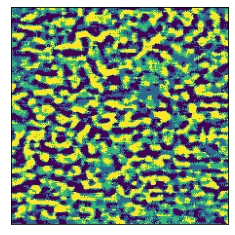

In [ ]:
plt.imshow(ori3), plt.xticks([]), plt.yticks([])
plt.savefig("pub_result/diff_sample3.jpg")

In [ ]:
print(vmax, vmin)

2.73054506610726 -7.865148445954995


(<matplotlib.image.AxesImage at 0x7f09cae94410>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

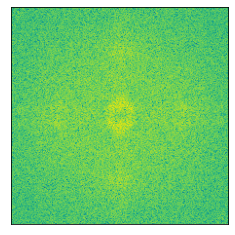

In [ ]:
p1 = display_fourier(get_fourier(ori1))
p2 = display_fourier(get_fourier(ori2))
p3 = display_fourier(get_fourier(ori3))

vmax = np.max(np.array([p1, p2, p3]))
vmin = np.min(np.array([p1, p2, p3]))
plt.imshow(p1, vmax=vmax, vmin=vmin), plt.xticks([]), plt.yticks([])
# plt.savefig('example_attack.jpg')

In [ ]:
import pdb

ages = [ '0-2', 
      '3-9',
      '10-19',
      '20-29',
      '30-39',
      '40-49',
      '50-59',
      '60-69',
      'more than 70',
      ]

races = ['East Asian',
      'White',
      'Latino_Hispanic',
      'Southeast Asian',
      'Black',
      'Indian',
      'Middle Eastern']

tones = ['dark', 'light']
all_ps = []
maxs = []
original_ps = []
dists = []

for i in races:
  fft_ps = []
  # fft_ps_abs = []
  ori_p = []
  # age_group = advs[ages[i]]

  ori = np.load("attack_perturbation/race/Fairface_layer0_3_layerall_3_att_1/{}_race_trial1.npy".format(i))
  dist = np.load("attack_perturbation/race/Fairface_layer0_3_layerall_3_att_1/{}_race_dist_trial1.npy".format(i))
  dists.append(np.mean(dist))

  one_channel_ori = np.mean(ori, axis=1) 
  pdb.set_trace()
  for one_ori in one_channel_ori:

    avg_p = one_ori

    fft_p = display_fourier(get_fourier(avg_p))
    if np.min(fft_p) == -float('inf') or np.max(fft_p) == float('inf'):
      continue
    else:
      ori_p.append(avg_p)
      fft_ps.append(fft_p)
    
    del avg_p, fft_p

  original_ps.append(one_channel_ori)
  all_ps.append(np.array(fft_ps))
  print("length of {} is {}".format(i, len(fft_ps)))
  tmp = np.mean(np.array(fft_ps))

  del one_channel_ori, fft_ps

  maxs.append(tmp)
  # maxs_abs.append(tmp_abs)

vmax = np.max(np.array(maxs))
vmin = np.min(np.array(maxs))
# vmax_abs = np.max(np.array(maxs_abs))
# vmin_abs = np.min(np.array(maxs_abs))

print(vmax, vmin)

In [ ]:
plt.figure(figsize=(6.4*21, 4.8*21), constrained_layout=False)
for i in range(7):

  d = dists[i]
  print("distance = {:.3f}".format(d*1000))
  a = np.mean(all_ps[i], axis=0)

  ax1 = plt.subplot(3, 7, i+1), plt.imshow(original_ps[i][0]), plt.title("Avg_P_Dist:{:.4f} \n {}_original_1".format(d*1000, races[i]), fontsize=90)
  ax2 = plt.subplot(3, 7, i+8), plt.imshow(original_ps[i][1]), plt.title("{}_original_2".format(races[i]))
  ax3 = plt.subplot(3, 7, i+15), plt.imshow(a, vmin=vmin, vmax=vmax), plt.title("{}_avged_spectrum".format(races[i]))

# plt.savefig('../7/fairface_fairface_conv19_race.pdf')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plt.figure(figsize=(6.4*21, 4.8*21), constrained_layout=False)
for i in range(7):

  d = dists[i]
  print("distance = {:.3f}".format(d*1000))
  a = np.mean(all_ps[i], axis=0)

  ax1 = plt.subplot(3, 7, i+1), plt.imshow(original_ps[i][0]), plt.title("Avg_P_Dist:{:.4f} \n {}_original_1".format(d*1000, ages[i]), fontsize=110)
  ax2 = plt.subplot(3, 7, i+8), plt.imshow(original_ps[i][1]), plt.title("{}_original_2".format(ages[i]), fontsize=110)
  ax3 = plt.subplot(3, 7, i+15), plt.imshow(a, vmin=vmin, vmax=vmax), plt.title("{}_avged_spectrum".format(ages[i]), fontsize=90)

# plt.savefig('../7/fairface_fairface_conv19_race.pdf')

In [ ]:
import pdb

ages = [ '0-2', 
      '3-9',
      '10-19',
      '20-29',
      '30-39',
      '40-49',
      '50-59',
      '60-69',
      'more than 70',
      ]

races = ['East Asian',
      'White',
      'Latino_Hispanic',
      'Southeast Asian',
      'Black',
      'Indian',
      'Middle Eastern']

skins = ['dark',
      'light']

ps = []
vmaxs = []
vmins = []
ds = []

folders = ['Fairface_layer0_3_layerall_3_att_2', 'Fairface_layer0_7_layerall_3_att_2', 'Fairface_layer0_11_layerall_3_att_2']

for s in folders:
  all_ps = []
  maxs = []
  original_ps = []
  dists = []
  for i in races:
    fft_ps = []
    # fft_ps_abs = []
    ori_p = []
    # age_group = advs[ages[i]]

    ori = np.load("attack_perturbation/race/{}/{}_race_trial2.npy".format(s, i))
    dist = np.load("attack_perturbation/race/{}/{}_race_dist_trial2.npy".format(s, i))
    dists.append(np.mean(dist))

    if len(ori) >= 3:
      ori = ori[:3]
    one_channel_ori = np.mean(ori, axis=1) 
    for one_ori in one_channel_ori:

      avg_p = one_ori
      fft_p = display_fourier(get_fourier(avg_p))

      if np.min(fft_p) == -float('inf') or np.max(fft_p) == float('inf'):
        continue
      else:
        ori_p.append(avg_p)
        fft_ps.append(fft_p)
      
      del avg_p, fft_p

    original_ps.append(one_channel_ori)
    all_ps.append(np.array(fft_ps))
    # all_ps_abs.append(np.array(fft_ps_abs))
    print("length of {} is {}".format(i, len(fft_ps)))
    tmp = np.mean(np.array(fft_ps))
    # tmp_abs = np.mean(np.array(fft_ps_abs))

    del one_channel_ori, fft_ps

    maxs.append(tmp)
    # maxs_abs.append(tmp_abs)

  vmax = np.max(np.array(maxs))
  vmin = np.min(np.array(maxs))
  # vmax_abs = np.max(np.array(maxs_abs))
  # vmin_abs = np.min(np.array(maxs_abs))

  print(vmax, vmin)
  vmaxs.append(vmax)
  vmins.append(vmin)

  to_plot = []
  for j in range(len(races)):
    a = np.mean(all_ps[j], axis=0)
    to_plot.append(a)

  
  ps.append(to_plot)
  ds.append(dists)

  del a, to_plot

length of East Asian is 3
length of White is 3
length of Latino_Hispanic is 3
length of Southeast Asian is 3
length of Black is 3
length of Indian is 3
length of Middle Eastern is 3
1.2792226033860017 -1.4536498488856289
length of East Asian is 3
length of White is 3
length of Latino_Hispanic is 3
length of Southeast Asian is 3
length of Black is 3
length of Indian is 3
length of Middle Eastern is 3
0.2817086594585353 -1.0977571168295275
length of East Asian is 3
length of White is 3
length of Latino_Hispanic is 3
length of Southeast Asian is 3
length of Black is 3
length of Indian is 3
length of Middle Eastern is 3
0.07439131131464055 -1.7674702329395593


In [ ]:
ps.shape

AttributeError: ignored

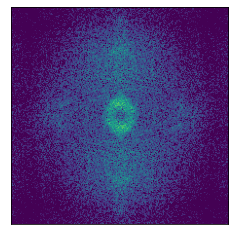

In [ ]:
vmin = min(vmins)
vmax = max(vmaxs)
plt.imshow(ps[0][0], vmax=vmax, vmin=vmin), plt.xticks([]), plt.yticks([])
plt.savefig("pub_result/diff_spec1.jpg")

In [ ]:
val_transforms = transforms.Compose([
            # transforms.ToPILImage(),
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
# input = Image.open('../fairface/t3.jpg')
# input = val_transforms(input)

In [ ]:
plt.figure(figsize=(9.6*21, 4.8*21), constrained_layout=False)
for j in range(1, 4):
  input = Image.open('../fairface/t{}.jpg'.format(j))
  input = val_transforms(input)
  f_ = get_fourier(input)
  f_show = np.mean(f_, axis=0)
  # for iy in range(224):
  #   for ix in range(224):
  #     if iy == 112 or ix == 112 or np.abs(112-ix) == np.abs(112-iy):
  #       f_show[iy, ix] += 25000
  ax1 = plt.subplot(3, 7, 7*(j-1)+1), plt.imshow(input.permute(1, 2, 0)), plt.xticks([]), plt.yticks([])
  ax1 = plt.subplot(3, 7, 7*(j-1)+2), plt.imshow(display_fourier(f_show)), plt.xticks([]), plt.yticks([])

  for i, k in enumerate([1, 7, 22, 36, 110]):
    cay = np.load("injection_corr/injection_corr_{}_8_dir.npy".format(k))
    f_ = get_fourier(input)
    for ary in cay:
      f_[:, int(ary[0][0]), int(ary[0][1])] += ary[1][0] + ary[1][1] * 1j
      tmp = torch.tensor(inverse_fft(f_), dtype=torch.float)
    tmp = torch.tensor(inverse_fft(f_))
    ax1 = plt.subplot(3, 7, 7*(j-1)+i+3), plt.imshow(tmp.permute(1, 2, 0)), plt.xticks([]), plt.yticks([])

# plt.savefig('pub_result/injection_sample.jpg')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# for i in [1, 7, 12, 22, 28, 36, 42, 47, 84, 98, 110]:

f_ = get_fourier(input)
inject = []
for iy in range(224):
  for ix in range(224):
    if iy == 112 or ix == 112 or np.abs(112-ix) == np.abs(112-iy):
      if np.abs(np.sqrt((iy-112)**2+(ix-112)**2) - 7) < 0.7:
        inject.append([int(iy), int(ix)])
print(i, len(inject))

x = []
for t in inject:

  v = np.random.rand(2)
  v_hat = v / np.linalg.norm(v)
  v_ = 100000*v_hat/len(inject)

  f_[:, t[0], t[1]] += v_[0] + v_[1] * 1j
  x.append([t, v_])

  # np.save("injection_corr/injection_corr_{}_8_dir.npy".format(i), x)
# tmp = torch.tensor(inverse_fft(f_))


110 8


In [ ]:
x = np.load("injection_corr/injection_corr_88.npy")

In [ ]:
x[0]

array([[ 24.        , 104.        ],
       [506.56847848, 697.53227733]])

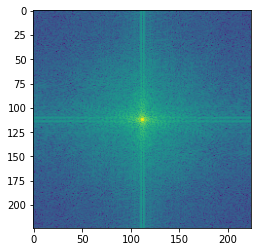

In [ ]:
plt.imshow(display_fourier(f_[0]))

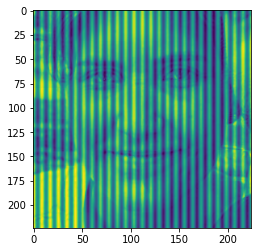

In [ ]:
f_ = get_fourier(input)
f_[0][112, 86] = 25000
plt.imshow(inverse_fft(f_[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


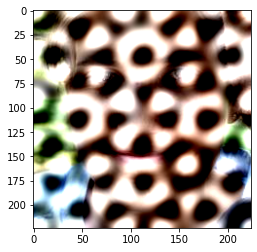

In [ ]:
plt.imshow(torch.tensor(inverse_fft(f_)).permute(1, 2, 0))

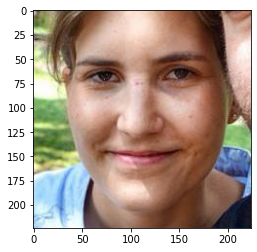

In [ ]:
plt.imshow(input.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


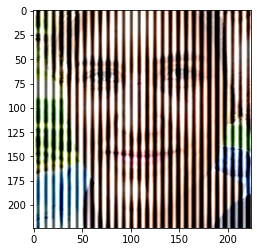

In [ ]:
plt.imshow(tmp.permute(1, 2, 0))

In [ ]:
to_display = get_fourier(input[0])
# to_display[0][0] = 5000
# print(to_display[0][0])
print(to_display[112][112])
real_ = to_display[112][112].real + 20000
# imag_ = to_display[112][112].imag + 2
to_display[112][112] = real_ + imag_*1j
print(to_display[112][112])
tmp2 = inverse_fft(to_display)

(31162.561418037396+0j)
(51162.561418037396+2j)


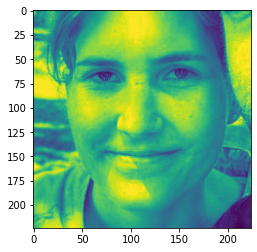

In [ ]:
plt.imshow(tmp2)

In [ ]:
tmp = get_fourier(input)
tmp1 = np.multiply(a, tmp)
tmp2 = inverse_fft(tmp1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


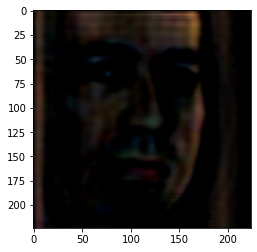

In [ ]:
plt.imshow(torch.tensor(tmp2).permute(1, 2, 0))

In [ ]:
shape = (224, 224)

def draw_cicle(shape,diamiter):
    '''
    Input:
    shape    : tuple (height, width)
    diameter : scalar
    
    Output:
    np.array of shape  that says True within a circle with diamiter =  around center 
    '''
    assert len(shape) == 2
    TF = np.zeros(shape)
    center = np.array(TF.shape)/2.0

    for iy in range(shape[0]):
        for ix in range(shape[1]):
            TF[iy,ix] = 1 if np.abs((iy- center[0]))**2 + np.abs((ix - center[1]))**2 < diamiter**2 else 0
    return(TF)


TFcircleIN = draw_cicle(shape=shape,diamiter=5)
# TFcircleOUT  = ~TFcircleIN

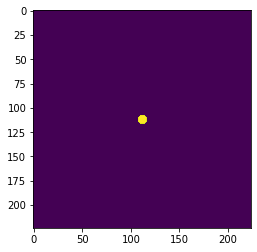

In [ ]:
plt.imshow(TFcircleIN)

In [ ]:
d = {}
for k in range(len(races)):
  d[races[k]] = TFcircleIN
with open("attack_mask/D_5_masks.pkl", "wb") as outfile:
  pickle.dump(d, outfile)

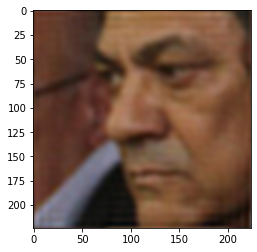

In [ ]:
plt.imshow(torch.tensor(tmp2).permute(1, 2, 0))

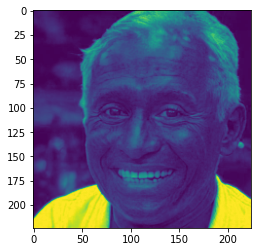

In [ ]:
plt.imshow(input)

In [ ]:
tmp1 = np.multiply(mask, tmp)

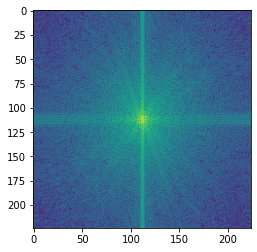

In [ ]:
plt.imshow(np.mean(tmp, axis=0))

In [ ]:
img = inverse_fft(tmp1)

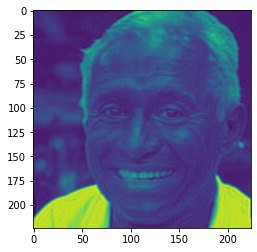

In [ ]:
plt.imshow(img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


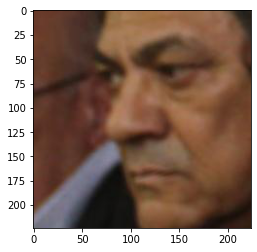

In [ ]:
plt.imshow(torch.tensor(input).permute(1, 2, 0))

In [ ]:
import pickle

for m in range(len(folders)):
  d = {}
  for k in range(len(races)):
    a = np.zeros([224, 224])
    for i in range(224):
      for j in range(224):
        if k == 4:
          if ps[m][k][i][j] >= -0.4:
            a[i][j] = 1
        else:
          if ps[m][k][i][j] >= 0:
            a[i][j] = 1
    d[races[k]] = a
  with open("attack_mask/model_{}_masks.pkl".format(folders[m]), "wb") as outfile:
    pickle.dump(d, outfile)

In [ ]:
import pickle

for d in [0, 0.6, 0.8]:
  for m in range(len(folders)):
    a = np.zeros([224, 224])
    for i in range(224):
      for j in range(224):
        if ps[m][6][i][j] >= d:
          a[i][j] = 1
    with open("attack_mask/Middle Eastern_g_{}_t_{}_masks.pkl".format(folders[m], d), "wb") as outfile:
      pickle.dump(a, outfile)

In [ ]:
d.keys()

dict_keys(['East Asian', 'White', 'Latino_Hispanic', 'Southeast Asian', 'Black', 'Indian', 'Middle Eastern'])

In [ ]:
a = np.zeros([224, 224])
for i in range(224):
  for j in range(224):
    if ps[0][6][i][j] >= 0:
      a[i][j] = 1

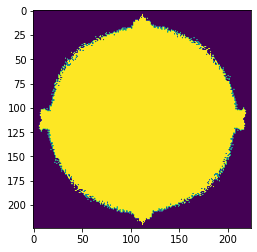

In [ ]:
plt.imshow(a)

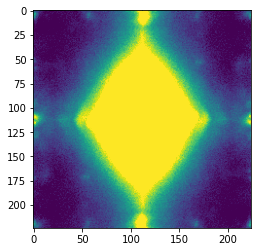

In [ ]:
plt.imshow(ps[3][6], vmin=vmin, vmax=vmax)

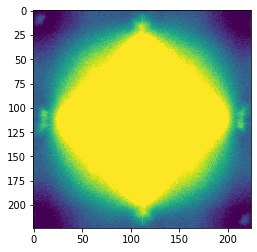

In [ ]:
plt.imshow(ps[0][0], vmin=vmin, vmax=vmax)

In [ ]:
a.shape

(224, 224)

In [ ]:
d={}
for i in races:
  d[i] = a

with open("attack_mask/model_extreme_1.4_masks.pkl", "wb") as outfile:
    pickle.dump(a, outfile)

In [ ]:
def cut_spectra(s, t=0):
  a = np.zeros([224, 224])
  for i in range(224):
    for j in range(224):
      if s[i][j] >= t:
        a[i][j] = 1
  return a

In [ ]:
plt.figure(figsize=(6.4*35, 4.8*35), constrained_layout=False)
vmin = min(vmins)
vmax = max(vmaxs)

for i in range(7):
  d = dists[i]
  print("distance = {:.3f}".format(d*1000))

  ax1 = plt.subplot(5, 7, i+1), plt.imshow(cut_spectra(ps[0][i], t=0)), plt.title("{}_avged_spectrum".format(races[i]), fontsize=105)
  ax2 = plt.subplot(5, 7, i+8), plt.imshow(cut_spectra(ps[1][i], t=0)), 
  ax3 = plt.subplot(5, 7, i+15), plt.imshow(cut_spectra(ps[2][i], t=0)),
  ax4 = plt.subplot(5, 7, i+22), plt.imshow(cut_spectra(ps[3][i], t=0)),
  ax5 = plt.subplot(5, 7, i+29), plt.imshow(cut_spectra(ps[4][i], t=0)),

  plt.savefig('../17/masks_layer_race_t_0.pdf')

distance = 1.991
distance = 2.224
distance = 2.524
distance = 1.930
distance = 1.723
distance = 2.357
distance = 2.859


In [ ]:
fig=plt.figure(figsize=(3.2*28, 1.6*28), constrained_layout=False)
vmin = min(vmins)
vmax = max(vmaxs)

for i in range(7):
  d = dists[i]
  print("distance = {:.3f}".format(d*1000))
  if i == 0:
    ax1 = plt.subplot(4, 7, i+1), plt.imshow(ps[0][i], vmin=vmin, vmax=vmax), plt.title("{}".format(races[i]), fontsize=90), plt.xticks([]), plt.yticks([]), plt.ylabel("Model_3", fontsize=80)
    ax2 = plt.subplot(4, 7, i+8), plt.imshow(ps[1][i], vmin=vmin, vmax=vmax), plt.xticks([]), plt.yticks([]), plt.xticks([]), plt.yticks([]), plt.ylabel("Model_7", fontsize=80)
    ax3 = plt.subplot(4, 7, i+15), plt.imshow(ps[2][i], vmin=vmin, vmax=vmax), plt.xticks([]), plt.yticks([]), plt.xticks([]), plt.yticks([]),plt.ylabel("Model_11", fontsize=80)
    ax4 = plt.subplot(4, 7, i+22), plt.imshow(ps[3][i] , vmin=vmin, vmax=vmax), plt.xticks([]), plt.yticks([]), plt.xticks([]), plt.yticks([]),plt.ylabel("Model_13", fontsize=80)
    # ax5 = plt.subplot(5, 7, i+29), plt.imshow(ps[4][i], vmin=vmin, vmax=vmax), plt.xticks([]), plt.yticks([]), plt.xticks([]), plt.yticks([]),plt.ylabel("Model_ViT", fontsize=80)
  else:
    ax1 = plt.subplot(4, 7, i+1), plt.imshow(ps[0][i], vmin=vmin, vmax=vmax), plt.title("{}".format(races[i]), fontsize=90), plt.xticks([]), plt.yticks([])
    ax2 = plt.subplot(4, 7, i+8), plt.imshow(ps[1][i], vmin=vmin, vmax=vmax), plt.xticks([]), plt.yticks([]),
    ax3 = plt.subplot(4, 7, i+15), plt.imshow(ps[2][i], vmin=vmin, vmax=vmax), plt.xticks([]), plt.yticks([]),
    ax4 = plt.subplot(4, 7, i+22), plt.imshow(ps[3][i] , vmin=vmin, vmax=vmax), plt.xticks([]), plt.yticks([]),
    # ax5 = plt.subplot(5, 7, i+29), plt.imshow(ps[4][i], vmin=vmin, vmax=vmax), plt.xticks([]), plt.yticks([]),

fig.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('pub_result/blocks_pert_layer_race_vit.pdf')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
masks = []
for d in [80, 30, 15, 10, 5]:
  with open('attack_mask/D_{}_masks.pkl'.format(d), 'rb') as f:
    mask = pickle.load(f)
    masks.append(mask['White'])

In [ ]:
import pdb

ages = [ '0-2', 
      '3-9',
      '10-19',
      '20-29',
      '30-39',
      '40-49',
      '50-59',
      '60-69',
      'more than 70',
      ]

races = ['East Asian',
      'White',
      'Latino_Hispanic',
      'Southeast Asian',
      'Black',
      'Indian',
      'Middle Eastern']

ps = []
vmaxs = []
vmins = []
ds = []

for s in [3, 7, 11, 15]:
  all_ps = []
  maxs = []
  original_ps = []
  dists = []
  for i in races:
    fft_ps = []
    # fft_ps_abs = []
    ori_p = []
    # age_group = advs[ages[i]]

    ori = np.load("conv{}_att_3/{}_race_trial3.npy".format(s, i))
    dist = np.load("conv{}_att_3/{}_race_dist_trial3.npy".format(s, i))
    dists.append(np.mean(dist))

    if len(ori) >= 1500:
      ori = ori[:1500]
    one_channel_ori = np.mean(ori, axis=1) 
    for one_ori in one_channel_ori:

      avg_p = one_ori
      fft_p = get_fourier(avg_p)
      energy = np.log(np.sqrt(fft_p.real**2 + fft_p.imag**2))
      
      if np.min(fft_p) == -float('inf') or np.max(fft_p) == float('inf'):
        continue
      else:
        ori_p.append(avg_p)
        fft_ps.append(energy)
      
      del avg_p, fft_p

    original_ps.append(one_channel_ori)
    all_ps.append(np.array(fft_ps))
    # all_ps_abs.append(np.array(fft_ps_abs))
    print("length of {} is {}".format(i, len(fft_ps)))
    tmp = np.mean(np.array(fft_ps))
    # tmp_abs = np.mean(np.array(fft_ps_abs))

    del one_channel_ori, fft_ps

    maxs.append(tmp)
    # maxs_abs.append(tmp_abs)

  vmax = np.max(np.array(maxs))
  vmin = np.min(np.array(maxs))
  # vmax_abs = np.max(np.array(maxs_abs))
  # vmin_abs = np.min(np.array(maxs_abs))

  print(vmax, vmin)
  vmaxs.append(vmax)
  vmins.append(vmin)

  to_plot = []
  for j in range(len(races)):
    a = np.mean(all_ps[j], axis=0)
    to_plot.append(a)

  
  ps.append(to_plot)
  ds.append(dists)

  del a, to_plot

In [ ]:
plt.figure(figsize=(6.4*28, 4.8*28), constrained_layout=False)
vmin = min(vmins)
vmax = max(vmaxs)

for i in range(7):
  # d = dists[i]
  # print("distance = {:.3f}".format(d*1000))

  ax1 = plt.subplot(4, 7, i+1), plt.imshow(ps[0][i], vmin=vmin, vmax=vmax), plt.title("{}_avged_spectrum_energy".format(races[i]), fontsize=85)
  ax2 = plt.subplot(4, 7, i+8), plt.imshow(ps[1][i], vmin=vmin, vmax=vmax), 
  ax3 = plt.subplot(4, 7, i+15), plt.imshow(ps[2][i], vmin=vmin, vmax=vmax),
  ax4 = plt.subplot(4, 7, i+22), plt.imshow(ps[3][i] , vmin=vmin, vmax=vmax),
  # ax5 = plt.subplot(5, 7, i+29), plt.imshow(ps[4][i], vmin=vmin, vmax=vmax),

plt.savefig('../8/energy_layer_race.pdf')

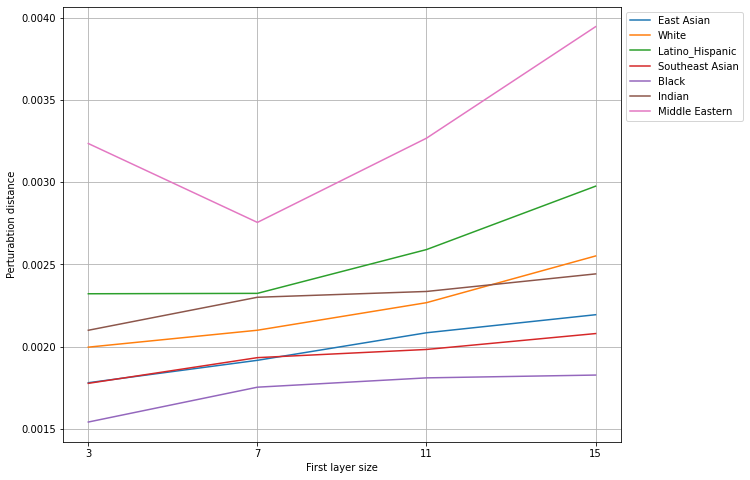

In [ ]:
ds = np.array(ds)
x = ['3', '7', '11', '15']
plt.figure(figsize=(10, 8))
for i in range(7):  
  plt.plot(x, ds[:, i], label=races[i])


plt.xlabel("First layer size")
plt.ylabel("Perturabtion distance")
plt.legend(bbox_to_anchor=(1 ,1))
plt.grid()
plt.savefig("../8/dist_layer_race.pdf")
plt.show()

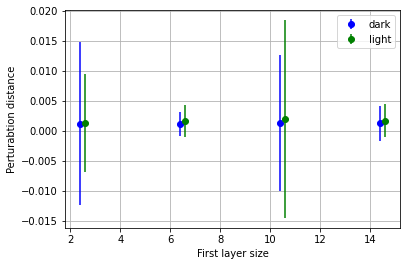

In [ ]:

for l in [3, 7, 11, 15]:
  for i in range(len(skins)):
    dist = np.load("conv{}_att_3/{}_skin_dist_trial3.npy".format(l, skins[i]))

    if l == 3:
      plt.errorbar(l+(i-3)/5, np.mean(dist), 2*np.std(dist), fmt='o', color=colors[i], label=skins[i])
    else:
      plt.errorbar(l+(i-3)/5, np.mean(dist), 2*np.std(dist), fmt='o', color=colors[i])

plt.grid()
plt.xlabel("First layer size")
plt.ylabel("Perturabtion distance")
plt.legend(bbox_to_anchor=(1 ,1))
# plt.ylim(-0.002, 0.002)
plt.savefig("../10/pert_race_errorbar.pdf", bbox_inches='tight')
plt.show()


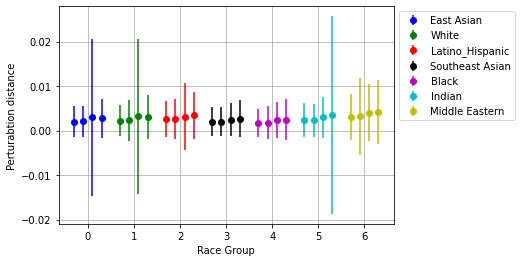

In [ ]:
x = range(7)
layers = ['conv7_att_3', 'conv11_att_race_1', 'layer0_11_layer123_7_att', 'layer0_11_layerall_7_att']
for i in range(len(races)):
  for l in range(4):
    # dist = np.load("conv{}_att_3/{}_race_dist_trial3.npy".format(layers[l], races[i]))
    dist = np.load("{}/{}_race_dist_trial1.npy".format(layers[l], races[i]))

    if l == 2:
      plt.errorbar(x[i]+(l-1.5)/5, np.mean(dist), 2*np.std(dist), fmt='o', color=colors[i], label=races[i])
    else:
      plt.errorbar(x[i]+(l-1.5)/5, np.mean(dist), 2*np.std(dist), fmt='o', color=colors[i])

plt.grid()
plt.xlabel("Race Group")
plt.ylabel("Perturabtion distance")
plt.legend(bbox_to_anchor=(1 ,1))
# plt.ylim(-0.0075, 0.0075)
plt.savefig("../14/race_pert_errorbar_blocks.pdf", bbox_inches='tight')
plt.show()


CNN visualize


In [ ]:
! ls models/

conv11_epoch_12.pt	conv7_epoch_13_test.pt	conv7_epoch_4_test.pt
conv3_epoch_14_r2.pt	conv7_epoch_14_test.pt	conv7_epoch_5_test.pt
conv7_epoch_0_test.pt	conv7_epoch_1_test.pt	conv7_epoch_6_test.pt
conv7_epoch_10_test.pt	conv7_epoch_24_r2.pt	conv7_epoch_7_test.pt
conv7_epoch_11_test.pt	conv7_epoch_2_test.pt	conv7_epoch_8_test.pt
conv7_epoch_12_test.pt	conv7_epoch_3_test.pt	conv7_epoch_9_test.pt


In [ ]:
model = torch.load("models/conv7_epoch_0_test.pt", map_location=torch.device('cpu'))

In [ ]:
model.conv1.weight.shape

torch.Size([64, 3, 7, 7])

In [ ]:
a = get_fourier(model.conv1.weight[0][0].data)

In [ ]:
a = np.mean(model.conv1.weight.detach().numpy(), axis=0)

In [ ]:
a = np.mean(a, axis=0)

In [ ]:
layers1 = []
layers2 = []
layers3 = []
layers4 = []

for i in range(15):
  model = torch.load("models/conv7_epoch_{}_test.pt".format(i), map_location=torch.device('cpu'))
  a = model.conv1.weight.detach().numpy()[0][0]
  b = model.conv1.weight.detach().numpy()[1][2]
  c = model.conv1.weight.detach().numpy()[10][2]
  d = model.conv1.weight.detach().numpy()[20][1]

  layers1.append(a)
  layers2.append(b)
  layers3.append(c)
  layers4.append(d)

In [ ]:
min1 = np.min(layers1)
max1 = np.max(layers1)

min2 = np.min(layers2)
max2 = np.max(layers2)

min3 = np.min(layers3)
max3 = np.max(layers3)

min4 = np.min(layers4)
max4 = np.max(layers4)

In [ ]:
plt.figure(figsize=(6.4*60, 4.8*60), constrained_layout=False)
for i in range(15):
  ax1 = plt.subplot(1, 15, i+1), plt.imshow(get_fourier(layers1[i])), plt.title("Epoch {}".format(i))
  ax2 = plt.subplot(2, 15, i+16), plt.imshow(get_fourier(layers2[i]))
  ax3 = plt.subplot(3, 15, i+31), plt.imshow(get_fourier(layers3[i]))
  ax4 = plt.subplot(4, 15, i+1), plt.imshow(get_fourier(layers4[i]))

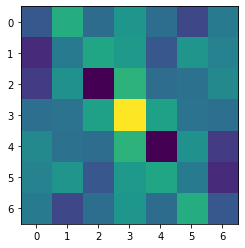

In [ ]:
plt.imshow(get_fourier(a)

In [ ]:
conv3_test = [93.73, 91.62, 92.47, 93.29, 85.91, 92.66, 94.20]
# conv3_train = [82.53, 87.14, 89.99, 94.77, 95.65, 95.63, 95.09, 93.41, 88.24]

# conv7_train = [82.31, 85.78, 89.99, 95.40, 96.19, 95.75, 95.42, 94.35, 89.19]
conv7_test = [93.29, 91.38, 92.84, 91.59, 88.21, 92.14, 93.35]

# conv11_train = [83.43, 87.83, 90.79, 95.98, 96.64, 96.59, 96.18, 93.23, 90.14]
conv11_test = [91.66, 91.57, 93.09, 91.94, 86.53, 93.05, 95.74]

conv15_test = [92.85, 90.84, 93.09, 92.01, 86.59, 92.66, 93.69]

conv19_test = [91.91, 90.54, 93.09, 91.87, 87.71, 92.53, 94.54]

In [ ]:
ages = [ '0-2', 
      '3-9',
      '10-19',
      '20-29',
      '30-39',
      '40-49',
      '50-59',
      '60-69',
      '> 70',
      ]

Acc/group

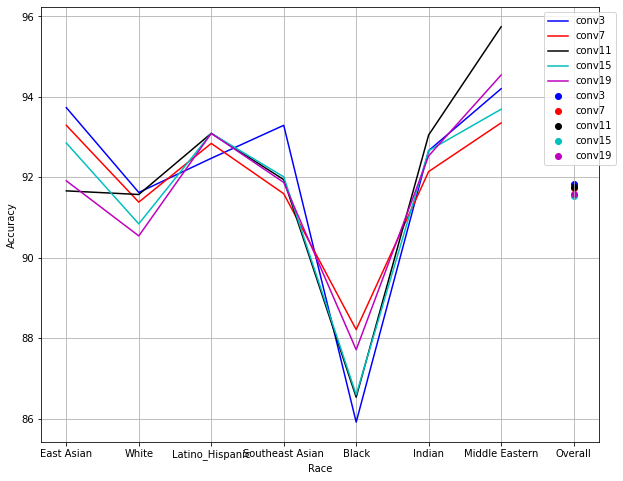

In [ ]:
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'k', 'm', 'w', 'c', 'y']
# plt.plot(ages, conv3_train, color='b', label='conv3_train')
plt.plot(races, conv3_test, color='b', label='conv3')
plt.plot(races, conv7_test, color='r', label='conv7')
plt.plot(races, conv11_test, color='k', label='conv11')
plt.plot(races, conv15_test, color='c', label='conv15')
plt.plot(races, conv19_test, color='m', label='conv19')

plt.scatter('Overall', 91.84, label='conv3', color='b')
plt.scatter('Overall', 91.74, label='conv7', color='r')
plt.scatter('Overall', 91.76, label='conv11', color='k')
plt.scatter('Overall', 91.54, label='conv15', color='c')
plt.scatter('Overall', 91.57, label='conv19', color='m')
plt.grid()
plt.xlabel("Race")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1.04,1))
plt.savefig('../7/race_acc.pdf')
plt.show()

In [ ]:
from PIL import Image
import torch
import timm
import requests
import torchvision.transforms as transforms
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD

print(torch.__version__)
# should be 1.8.0


model = torch.hub.load('facebookresearch/deit:main', 'deit_base_patch16_224', pretrained=True)
model.eval()

val_transforms = transforms.Compose([
            # transforms.ToPILImage(),
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
input = Image.open('../skintone/04_0003_A0_C1_H1_G0.jpg')
input = val_transforms(input)
torch.argmax(model(input.reshape(1, 3, 224, 224).cpu()))

1.10.0+cu111


Using cache found in /root/.cache/torch/hub/facebookresearch_deit_main


tensor(419)

In [ ]:
def img_to_patch(x, patch_size, flatten_channels=True):
  """
  Inputs:
      x - torch.Tensor representing the image of shape [B, C, H, W]
      patch_size - Number of pixels per dimension of the patches (integer)
      flatten_channels - If True, the patches will be returned in a flattened format
                          as a feature vector instead of a image grid.
  """
  B, C, H, W = x.shape
  x = x.reshape(B, C, H//patch_size, patch_size, W//patch_size, patch_size)
  x = x.permute(0, 2, 4, 1, 3, 5) # [B, H', W', C, p_H, p_W]
  x = x.flatten(1,2)              # [B, H'*W', C, p_H, p_W]
  if flatten_channels:
      x = x.flatten(2,4)          # [B, H'*W', C*p_H*p_W]
  return x

torch.Size([1, 64, 3, 28, 28])


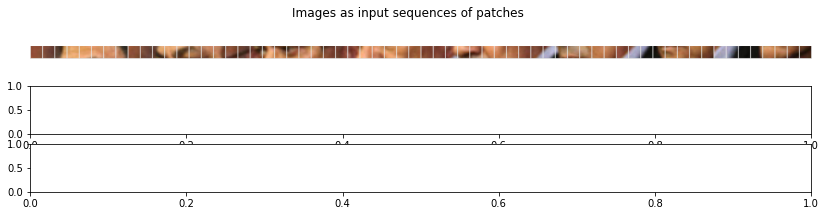

In [ ]:
import torchvision

img_patches = img_to_patch(input.reshape(1,3,224,224), patch_size=28, flatten_channels=False)
print(img_patches.shape)
fig, ax = plt.subplots(input.shape[0], 1, figsize=(14,3))
fig.suptitle("Images as input sequences of patches")
for i in range(1):
    img_grid = torchvision.utils.make_grid(img_patches[i], nrow=64, normalize=True, pad_value=0.9)
    img_grid = img_grid.permute(1, 2, 0)
    ax[i].imshow(img_grid)
    ax[i].axis('off')
plt.show()
plt.close()

In [ ]:
# mask

acc_3 = [[0.9285266457680251, 0.916217540421362, 0.9303201506591338, 0.9173144876325088, 0.8590937306021105, 0.9161205766710354, 0.9428815004262575],
      [0.9191222570532915, 0.9073983341499265, 0.9252981795354677, 0.9102473498233216, 0.8553693358162632, 0.9108781127129751, 0.9377664109121909],
      [0.8639498432601881, 0.8647721705046546, 0.8713119899560577, 0.8713780918727915, 0.7628801986343886, 0.8479685452162516, 0.8985507246376812],
      [0.7962382445141066, 0.7932386085252328, 0.807909604519774, 0.7915194346289752, 0.6952203600248293, 0.7673656618610747, 0.8610400682011935]]

acc_7 = [[0.9090909090909091, 0.9137677609015189, 0.935969868173258, 0.9187279151943463, 0.8752327746741154, 0.926605504587156, 0.9522591645353794],
      [0.9059561128526645, 0.910828025477707, 0.928436911487759, 0.9151943462897526, 0.8690254500310366, 0.9252948885976409, 0.9531116794543905],
      [0.8583072100313479, 0.8530132288094071, 0.8688010043942247, 0.8621908127208481, 0.7852265673494724, 0.8538663171690695, 0.9019607843137255],
      [0.7730407523510971, 0.7555120039196472, 0.7821720025109855, 0.7865724381625442, 0.685909373060211, 0.7306684141546527, 0.8201193520886616]]

acc_11 = [[0.9072100313479624, 0.9113179813816756, 0.9259259259259259, 0.901060070671378, 0.8739913097454997, 0.9259501965923984, 0.9505541346973572],
      [0.8915360501567398, 0.9093581577658011, 0.9259259259259259, 0.8989399293286219, 0.8727498448168839, 0.9233289646133683, 0.9454390451832907],
      [0.8257053291536051, 0.8348848603625674, 0.8330194601381042, 0.8346289752650177, 0.7510862818125388, 0.8145478374836173, 0.8772378516624041],
      [0.7335423197492164, 0.7373836354728075, 0.7263025737602009, 0.7434628975265017, 0.6585971446306642, 0.6795543905635649, 0.8022165387894288]]

acc_13 = [[0.915987460815047, 0.9010289073983342, 0.9234149403640929, 0.903886925795053, 0.8721291123525761, 0.919397116644823, 0.9326513213981245],
      [0.9166144200626959, 0.8975992160705536, 0.9183929692404269, 0.8989399293286219, 0.8659217877094972, 0.918086500655308, 0.928388746803069],
      [0.8551724137931035, 0.83390494855463, 0.8449466415568111, 0.8318021201413428, 0.7541899441340782, 0.8466579292267365, 0.8815004262574595],
      [0.7711598746081505, 0.7677609015188633, 0.7715003138731952, 0.7660777385159011, 0.6815642458100558, 0.7214941022280472, 0.8252344416027281]]

acc_vit = [[0.8677115987460815, 0.8569328760411563, 0.8713119899560577, 0.8409893992932862, 0.7796399751707014, 0.8617300131061599, 0.8832054560954816],
      [0.8507836990595611, 0.854483096521313, 0.864406779661017, 0.8360424028268552, 0.7684667908131595, 0.8499344692005243, 0.8704177323103154],
      [0.8300940438871474, 0.8402743753062224, 0.8468298807281858, 0.8226148409893993, 0.7585350713842334, 0.8315858453473133, 0.8584825234441603],
      [0.8188087774294671, 0.8172464478196962, 0.8317639673571877, 0.8035335689045936, 0.7237740533829919, 0.8237221494102228, 0.8653026427962489],
      ]
data = np.array([acc_3, acc_7, acc_11, acc_13, acc_vit])

In [ ]:
# modify

acc_3 = [[0.9322884012539185, 0.916217540421362, 0.9296924042686755, 0.9187279151943463, 0.8721291123525761, 0.9213630406290957, 0.9437340153452686], # ori
      [0.8376175548589342, 0.8584027437530622, 0.8832391713747646, 0.8480565371024735, 0.7591558038485413, 0.8656618610747051, 0.9011082693947144],  # 111
      [0.8006269592476489, 0.8157765801077903, 0.8468298807281858, 0.7978798586572439, 0.707635009310987, 0.8099606815203145, 0.8448422847399829],  #105
      [0.7623824451410658, 0.7628613424791769, 0.7890772128060264, 0.7462897526501767, 0.6635630043451273, 0.7568807339449541, 0.814151747655584],  # 100
      [0.8601880877742947, 0.8628123468887801, 0.8863779033270559, 0.8671378091872791, 0.7740533829919305, 0.872870249017038, 0.9104859335038363],  # 90
      [0.8608150470219436, 0.8613424791768741, 0.8807281858129316, 0.8579505300353357, 0.7566728739913098, 0.8636959370904325, 0.9130434782608695],  # 84
      [0.8219435736677116, 0.8363547280744733, 0.8581293157564344, 0.8204946996466431, 0.7312228429546865, 0.836173001310616, 0.8857630008525149],  # 76
      [0.8282131661442006, 0.8392944634982852, 0.8631512868801005, 0.8204946996466431, 0.7343265052762259, 0.8315858453473133, 0.8797953964194374],  # 70
      [0.8338557993730408, 0.8466438020578148, 0.8700564971751412, 0.8346289752650177, 0.7442582247051521, 0.8433813892529489, 0.8789428815004262],  # 65
      [0.8526645768025078, 0.8686918177364037, 0.898932831136221, 0.8636042402826856, 0.7939168218497827, 0.872870249017038, 0.907928388746803],   # 28
      [0.8495297805642633, 0.8701616854483096, 0.8983050847457628, 0.8572438162544169, 0.7796399751707014, 0.8617300131061599, 0.907075873827792]]  # 14

acc_7 = [[0.909717868338558, 0.9142577168054875, 0.9353421217827997, 0.9201413427561838, 0.8739913097454997, 0.926605504587156, 0.9497016197783461],
         [0.896551724137931, 0.9167074963253308, 0.9322033898305084, 0.9208480565371024, 0.8733705772811918, 0.9187418086500655, 0.9471440750213129],
         [0.8081504702194358, 0.8206761391474767, 0.8681732580037664, 0.7879858657243817, 0.7262569832402235, 0.8315858453473133, 0.8644501278772379],
         [0.6050156739811913, 0.6697697207251347, 0.7332077840552417, 0.6268551236749117, 0.6288019863438857, 0.745740498034076, 0.6734867860187553],
         [0.6288401253918495, 0.637922586967173, 0.7212806026365348, 0.6416961130742049, 0.6194909993792675, 0.6985583224115334, 0.6581415174765558],
      [0.6564263322884013, 0.6276335129838314, 0.7112366603892027, 0.6522968197879858, 0.6132836747361887, 0.6664482306684142, 0.6504688832054561],
      [0.7567398119122257, 0.7373836354728075, 0.8254865034526051, 0.7745583038869258, 0.6939788950962136, 0.7771952817824378, 0.8115942028985508],
      [0.8633228840125392, 0.8657520823125918, 0.8957940991839297, 0.8742049469964664, 0.8144009931719429, 0.8840104849279161, 0.9173060528559249],
      [0.9047021943573668, 0.9093581577658011, 0.9353421217827997, 0.9144876325088339, 0.8708876474239603, 0.9174311926605505, 0.9437340153452686],
      [0.9065830721003135, 0.9137677609015189, 0.9365976145637163, 0.9194346289752651, 0.8801986343885785, 0.926605504587156, 0.9514066496163683],
      [0.8764890282131661, 0.8926996570308672, 0.9171374764595104, 0.8897526501766785, 0.8429546865301055, 0.9056356487549148, 0.9352088661551577]]

acc_11 = [[0.9059561128526645, 0.9113179813816756, 0.9271814187068425, 0.9031802120141342, 0.8733705772811918, 0.9252948885976409, 0.9497016197783461],
          [0.9040752351097179, 0.9073983341499265, 0.9227871939736346, 0.9074204946996467, 0.8789571694599627, 0.916775884665793, 0.9403239556692242],
          [0.780564263322884, 0.82312591866732, 0.8543628374136849, 0.7929328621908127, 0.6952203600248293, 0.8224115334207077, 0.8618925831202046],
          [0.7630094043887148, 0.7829495345418912, 0.815442561205273, 0.7632508833922261, 0.6765983860955928, 0.7758846657929227, 0.8491048593350383],
          [0.7554858934169278, 0.7751102400783929, 0.8355304456999372, 0.76113074204947, 0.6828057107386716, 0.7889908256880734, 0.8277919863597613],
      [0.8075235109717869, 0.829985301322881, 0.8725674827369743, 0.8268551236749117, 0.7349472377405338, 0.8466579292267365, 0.8746803069053708],
      [0.8971786833855799, 0.9005389514943655, 0.9152542372881356, 0.9060070671378092, 0.8621973929236499, 0.9161205766710354, 0.9454390451832907],
      [0.9090909090909091, 0.9078882900538952, 0.9202762084118016, 0.9074204946996467, 0.8739913097454997, 0.9305373525557011, 0.9462915601023018],
      [0.9084639498432602, 0.9098481136697697, 0.9221594475831764, 0.9024734982332155, 0.8752327746741154, 0.9272608125819135, 0.9531116794543905],
      [0.9059561128526645, 0.9103380695737384, 0.9252981795354677, 0.9053003533568904, 0.8758535071384234, 0.9259501965923984, 0.9497016197783461],
      [0.9078369905956113, 0.910828025477707, 0.9252981795354677, 0.9017667844522969, 0.8764742396027312, 0.9272608125819135, 0.9437340153452686]]

acc_13 = [[0.9178683385579938, 0.9020088192062714, 0.9171374764595104, 0.9053003533568904, 0.8702669149596524, 0.918086500655308, 0.9335038363171355],
          [0.9216300940438872, 0.9069083782459578, 0.9221594475831764, 0.9031802120141342, 0.8646803227808815, 0.916775884665793, 0.927536231884058],
          [0.8156739811912226, 0.8275355218030377, 0.8587570621468926, 0.8056537102473498, 0.7330850403476101, 0.8171690694626474, 0.875532821824382],
          [0.7410658307210032, 0.7658010779029887, 0.7815442561205274, 0.719434628975265, 0.6530105524518932, 0.7359108781127129, 0.7996589940323956],
          [0.7655172413793103, 0.7907888290053895, 0.8449466415568111, 0.7646643109540636, 0.7045313469894475, 0.7804718217562254, 0.8405797101449275],
      [0.8852664576802508, 0.8848603625673689, 0.9146264908976773, 0.8918727915194347, 0.8355058969584109, 0.9030144167758847, 0.9309462915601023],
      [0.9272727272727272, 0.9069083782459578, 0.9158819836785939, 0.9074204946996467, 0.8646803227808815, 0.9200524246395806, 0.9420289855072463],
      [0.9266457680250784, 0.9054385105340519, 0.9177652228499686, 0.9017667844522969, 0.8665425201738051, 0.9187418086500655, 0.9343563512361467],
      [0.9210031347962383, 0.9044585987261147, 0.9202762084118016, 0.9045936395759717, 0.8702669149596524, 0.9213630406290957, 0.9326513213981245],
      [0.9178683385579938, 0.9044585987261147, 0.9221594475831764, 0.9053003533568904, 0.8746120422098076, 0.919397116644823, 0.9335038363171355],
      [0.9172413793103448, 0.9059284664380206, 0.9215317011927181, 0.901060070671378, 0.8665425201738051, 0.918086500655308, 0.9309462915601023]]

acc_vit = [[0.8677115987460815, 0.8593826555609995, 0.8713119899560577, 0.8395759717314487, 0.776536312849162, 0.8636959370904325, 0.8849104859335039],
           [0.8677115987460815, 0.8569328760411563, 0.8713119899560577, 0.8409893992932862, 0.7796399751707014, 0.8617300131061599, 0.8832054560954816],
      [0.8507836990595611, 0.854483096521313, 0.864406779661017, 0.8360424028268552, 0.7684667908131595, 0.8499344692005243, 0.8704177323103154],
      [0.8608150470219436, 0.8520333170014699, 0.8713119899560577, 0.8395759717314487, 0.7777777777777778, 0.8604193971166448, 0.8780903665814151],
      [0.8188087774294671, 0.8172464478196962, 0.8317639673571877, 0.8035335689045936, 0.7237740533829919, 0.8237221494102228, 0.8653026427962489],
      ]
data = np.array([acc_3, acc_7, acc_11, acc_13])

In [ ]:
data.shape

(4, 11, 7)

In [11]:
xs = []
for i in [1, 7, 12, 22, 28, 36, 42, 47, 84, 98, 110, -1]:
  x = np.load("results_acc/injection_acc_{}_8_dir_trial1.npy".format(i))
  xs.append(x)

In [12]:
old_data = np.stack(xs, axis=1)
data = np.zeros((6,12,7))
data[0,:,:]=old_data[1,:,:]
data[1,:,:]=old_data[0,:,:]
for i in range(2,6):
  data[i,:,:] = old_data[i,:,:]

In [13]:
data.shape

(6, 12, 7)

In [26]:
high_race = np.zeros((6,7))
low_race = np.zeros((6,7))
for k in range(data.shape[0]):
  for r in range(data.shape[2]):
    curr_data = data[k,:-1,r]
    curr_tar = data[k,-1,r]

    low_acc = np.mean(curr_data[0:3])
    high_acc = np.mean(curr_data[-4:])

    low_drop = curr_tar - low_acc
    high_drop = curr_tar - high_acc
    
    high_race[k,r] = high_drop
    low_race[k,r] = low_drop

In [64]:
import seaborn as sns
lst = [50,100,200,300,400,500,600]
palette = sns.color_palette("inferno", 7)

In [68]:
type(palette)

seaborn.palettes._ColorPalette

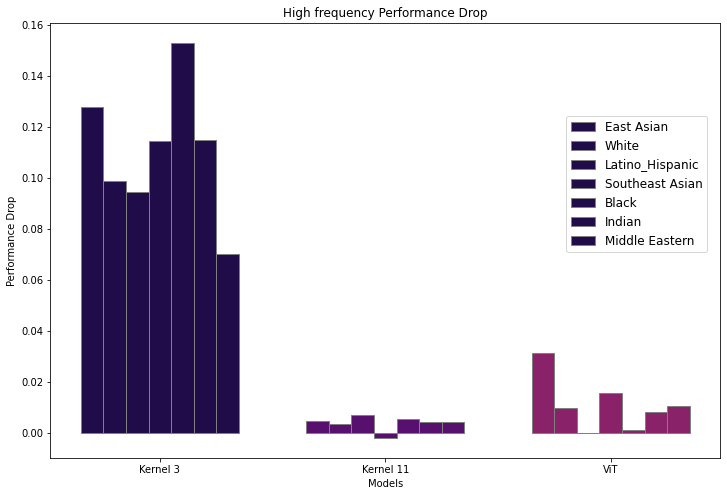

In [72]:
races = [
      'East Asian', #5
      'White', #7
      'Latino_Hispanic', #6
      'Southeast Asian', #4
      'Black', #1
      'Indian', #2 
      'Middle Eastern'] #3

fig = plt.figure(figsize=(12, 8))
barWidth = 0.10

acc_grps = []
for i in range(7):
  acc3 = high_race[0,i]
  acc11 = high_race[-3,i]
  accvit = high_race[-1,i]
  acc_grps.append([acc3, acc11, accvit])

br1 = [-0.3,0.7,1.7]
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
brs = [br1, br2, br3, br4, br5, br6, br7]

# ax1 = plt.subplot()
# Make the plot
for i in range(7):
  plt.bar(brs[i], acc_grps[i], color=palette, width = barWidth,
          edgecolor ='grey', label = races[i])

plt.ylabel("Performance Drop")
plt.title("frequency {}".format(f))
# plt.ylim(0,1)
plt.title("High frequency Performance Drop")
plt.legend(bbox_to_anchor=(0.99, 0.8), fontsize=12)
plt.xlabel("Models")
plt.xticks([0,1,2], ["Kernel 3", "Kernel 11", "ViT"])
# plt.savefig('23/freq_High_accdrop.jpg')
plt.show()

In [ ]:
races = ['',
      'East Asian', #5
      'White', #7
      'Latino_Hispanic', #6
      'Southeast Asian', #4
      'Black', #1
      'Indian', #2 
      'Middle Eastern'] #3

fig = plt.figure(figsize=(18, 16))
barWidth = 0.10
k=1
for i, f in zip([2, 4, 7, 9], [12, 28, 47, 98]):
  ax1 = plt.subplot(4,1,k)
  freq12 = data[:,i,:]

  acc3 = freq12[0]
  acc5 = freq12[1]
  acc7 = freq12[2]
  acc11 = freq12[3]
  acc13 = freq12[4]
  accvit = freq12[5]

  br1 = np.arange(len(acc5))
  br2 = [x + barWidth for x in br1]
  br3 = [x + barWidth for x in br2]
  br4 = [x + barWidth for x in br3]
  br5 = [x + barWidth for x in br4]
  br6 = [x + barWidth for x in br5]
  br7 = [x + barWidth for x in br6]
  # ax1 = plt.subplot()
  # Make the plot
  plt.bar(br1, acc3, color =colors[0], width = barWidth,
          edgecolor ='grey', label ='Kernel 3')
  plt.bar(br2, acc5, color =colors[3], width = barWidth,
          edgecolor ='grey', label ='Kernel 5')
  plt.bar(br3, acc7, color =colors[2], width = barWidth,
          edgecolor ='grey', label ='Kernel 7')
  plt.bar(br4, acc11, color =colors[1], width = barWidth,
          edgecolor ='grey', label ='Kernel 11')
  plt.bar(br5, acc13, color =colors[4], width = barWidth,
          edgecolor ='grey', label ='Kernel 13')
  plt.bar(br6, accvit, color =colors[5], width = barWidth,
          edgecolor ='grey', label ='ViT')
  # plt.bar(br7, w, color =colors[6], width = barWidth,
  #         edgecolor ='grey', label ='Middle Eastern')
  
  plt.ylabel("Accuracy")
  plt.title("frequency {}".format(f))
  plt.ylim(0,1)
  ax1.set_xticklabels(races)
  # plt.savefig('22/acc_race_freq_{}'.format(f))
  k+=1
plt.legend(bbox_to_anchor=(0.99, 0.8), fontsize=12)
plt.xlabel("Race")
plt.savefig('22/acc_race_freq')
plt.show()

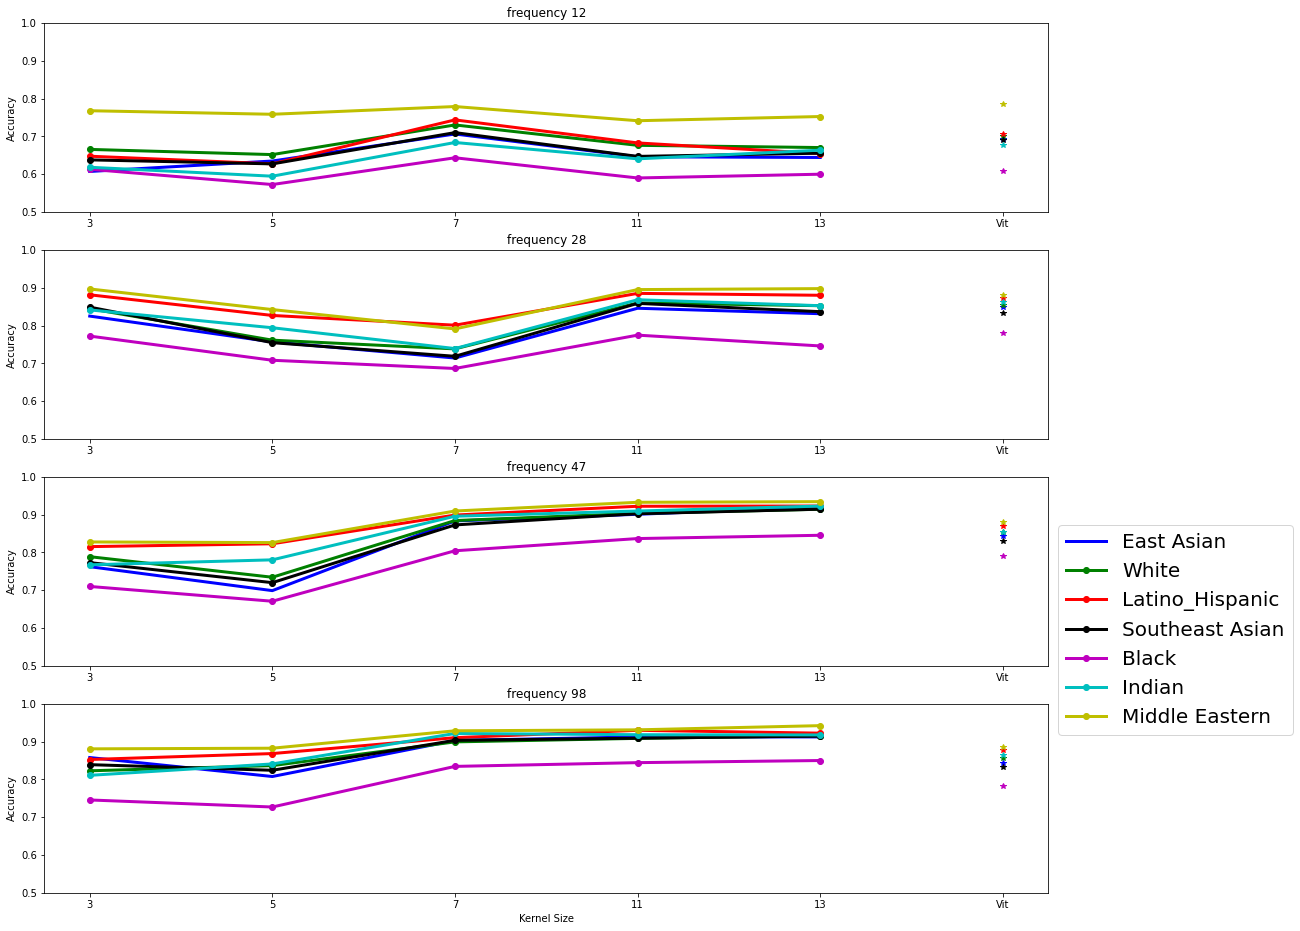

In [ ]:
#races = ['East Asian',
      'White',
      'Latino_Hispanic',
      'Southeast Asian',
      'Black',
      'Indian',
      'Middle Eastern']

fig = plt.figure(figsize=(18, 16))
k=1
for i, f in zip([2, 4, 7, 9], [12, 28, 47, 98]):

  plt.subplot(4,1,k)
  freq12 = data[0:5,i,:]
  acc_vit = data[5,i,:]
  acc1 = freq12[:,0]
  acc2 = freq12[:,1]
  acc3 = freq12[:,2]
  acc4 = freq12[:,3]
  acc5 = freq12[:,4]
  acc6 = freq12[:,5]
  acc7 = freq12[:,6]

  x_range=['3', '5', '7', '11', '13']
  plt.plot( x_range, acc1, '-0', label = races[0], linewidth=3, color=colors[0])
  plt.plot( x_range, acc2, '-o', label = races[1], linewidth=3, color=colors[1])
  plt.plot( x_range, acc3, '-o', label = races[2], linewidth=3, color=colors[2])
  plt.plot( x_range, acc4, '-o', label = races[3], linewidth=3, color=colors[3])
  plt.plot( x_range, acc5, '-o', label = races[4], linewidth=3, color=colors[4])
  plt.plot( x_range, acc6, '-o', label = races[5], linewidth=3, color=colors[5])
  plt.plot( x_range, acc7, '-o', label = races[6], linewidth=3, color=colors[6])
  for j in range(7):
    plt.plot('Vit', acc_vit[j], marker='*', color=colors[j])

  plt.title("frequency {}".format(f))
  plt.ylim(0.5, 1)
  # plt.xlabel("Kernel Size")
  plt.ylabel("Accuracy")
  
  
  # plt.savefig('22/acc_kernel_freq_{}'.format(f))
  k+=1
plt.xlabel("Kernel Size")
plt.legend(bbox_to_anchor=(1, 2), fontsize=20)
plt.savefig('22/acc_kernel_freq')
plt.show()

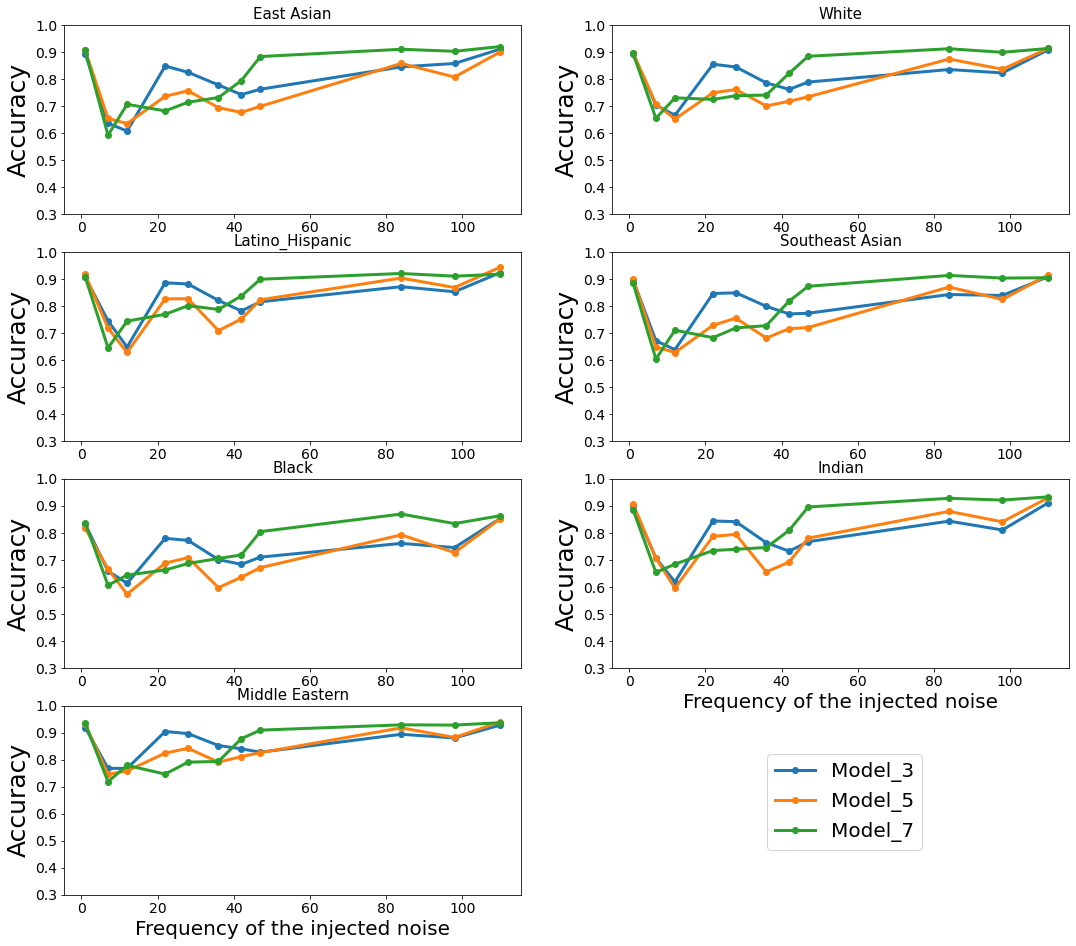

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

races = ['East Asian',
      'White',
      'Latino_Hispanic',
      'Southeast Asian',
      'Black',
      'Indian',
      'Middle Eastern']

# set width of bar
barWidth = 0.10
# fig = plt.subplots(figsize =(12, 8))
# fig, ax = plt.subplots(3, 3, figsize=(5.6*9, 4.2*9))


fig = plt.figure(figsize=(18, 16))

for race_i in range(7):
  # set height of bar
  m5 =  data[0,:,race_i]
  e3 =  data[1,:,race_i]
  i7 =  data[2,:,race_i]
  l11 = data[3,:,race_i]
  m13 = data[4,:,race_i]
  sv =  data[5,:,race_i]
  # w = data[:, 6]
  
  x_range = [1, 7, 12, 22, 28, 36, 42, 47, 84, 98, 110]
  # x_range = [120, 111, 105, 100, 90, 84, 76, 70, 65, 28, 14]
  # Make the plot
  # if race_i != 6:
  plt.subplot(4,2,race_i+1)
  # else:
  #   plt.subplot(4,2,7)
  plt.plot( x_range, e3, '-o', label ='Model_3', linewidth=3)
  plt.plot( x_range, m5, '-o', label ='Model_5', linewidth=3)
  plt.plot( x_range, i7, '-o', label ='Model_7', linewidth=3)
  # plt.plot( x_range, l11, '-o', label ='Model_11', linewidth=3)
  # plt.plot( x_range, m13, label ='Model_13', linewidth=3)
  # plt.plot( x_range, sv, '-*', label ='Model_ViT', linewidth=3)
  # ax[x_i, y_i].plot(['80', '30', '15', '10'], m, '-o', label ='Model_ViT')
  plt.ylim(0.3, 1)
  plt.title(races[race_i], fontsize=15)
  plt.ylabel('Accuracy', fontsize=25)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  if race_i == 6 or race_i == 5:
    plt.xlabel('Frequency of the injected noise', fontsize=20)
  # ax[x_i, y_i].tick_params(axis='both', which='major', labelsize=30)
  # ax[x_i, y_i].set_ylabel('Acc', fontsize=40)
  # ax[x_i, y_i].legend(bbox_to_anchor=(0.99, 1), fontsize=20)

  # Adding Xticks
  # ax[x_i, y_i].xlabel('Mask Size', fontweight ='bold', fontsize = 15)
  # ax[x_i, y_i].ylabel('Accuracy', fontweight ='bold', fontsize = 15)
  if race_i == 6:
    plt.legend(bbox_to_anchor=(1.9, 0.8), fontsize=20)
  
  # plt.yscale('log') 
# plt.savefig("pub_result/acc_race_fairface_trial1_.pdf")

plt.show()

In [ ]:
acc_3 = [[0.9288537549407114, 0.9450402144772118, 0.8893058161350844, 0.9225908372827805, 0.9018181818181819],
      [0.9288537549407114, 0.9436997319034852, 0.8874296435272045, 0.9257503949447078, 0.9018181818181819],
      [0.9104084321475626, 0.9168900804289544, 0.8686679174484052, 0.8973143759873617, 0.9018181818181819],
      [0.8774703557312253, 0.903485254691689, 0.8255159474671669, 0.8815165876777251, 0.88],
      [0.6897233201581028, 0.6970509383378016, 0.724202626641651, 0.7709320695102686, 0.7127272727272728]]

acc_7 = [[0.9262187088274044, 0.9423592493297587, 0.8855534709193246, 0.9289099526066351, 0.8872727272727273],
      [0.9150197628458498, 0.9396782841823056, 0.8930581613508443, 0.9210110584518167, 0.8872727272727273],
      [0.88866930171278, 0.8994638069705094, 0.851782363977486, 0.8799368088467614, 0.8836363636363637],
      [0.8557312252964426, 0.8914209115281502, 0.8048780487804879, 0.8704581358609794, 0.8472727272727273],
      [0.7022397891963109, 0.7265415549597856, 0.7054409005628518, 0.7835703001579779, 0.730909090909091]
      ]

acc_11 = [[0.9361001317523057, 0.9463806970509383, 0.8893058161350844, 0.9178515007898894, 0.92],
      [0.9354413702239789, 0.9490616621983914, 0.8855534709193246, 0.9210110584518167, 0.9236363636363636],
      [0.8926218708827405, 0.9115281501340483, 0.8724202626641651, 0.8988941548183255, 0.9127272727272727],
      [0.8682476943346509, 0.8900804289544236, 0.8348968105065666, 0.8783570300157978, 0.8618181818181818],
      [0.6732542819499341, 0.660857908847185, 0.6622889305816135, 0.7361769352290679, 0.7236363636363636]]

acc_13 = [[0.9216073781291173, 0.9450402144772118, 0.9080675422138836, 0.9257503949447078, 0.8981818181818182],
      [0.9255599472990778, 0.938337801608579, 0.9174484052532833, 0.933649289099526, 0.9054545454545454],
      [0.9077733860342556, 0.9235924932975871, 0.8874296435272045, 0.9146919431279621, 0.8981818181818182],
      [0.8623188405797102, 0.8954423592493298, 0.8105065666041276, 0.8925750394944708, 0.8690909090909091],
      [0.6930171277997365, 0.7211796246648794, 0.726078799249531, 0.7867298578199052, 0.72]]

data = np.array([acc_3, acc_7, acc_11, acc_13])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

races = ['White',
      'Black', 
      'Asian', 
      'Indian', 
      'Others']

# set width of bar
barWidth = 0.10
fig = plt.subplots(figsize =(12, 8))

race_i = 3
# set height of bar
b = data[0,:,race_i]
e = data[1,:,race_i]
i = data[2,:,race_i]
l = data[3,:,race_i]
# m = data[:, 4]
# s = data[:, 5]
# w = data[:, 6]
 
# Set position of bar on X axis
br1 = np.arange(len(b))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
# br5 = [x + barWidth for x in br4]
# br6 = [x + barWidth for x in br5]
# br7 = [x + barWidth for x in br6]
 
# Make the plot
plt.bar(br1, b, color =colors[0], width = barWidth,
        edgecolor ='grey', label ='Model_3')
plt.bar(br2, e, color =colors[3], width = barWidth,
        edgecolor ='grey', label ='Model_7')
plt.bar(br3, i, color =colors[2], width = barWidth,
        edgecolor ='grey', label ='Model_11')
plt.bar(br4, l, color =colors[1], width = barWidth,
        edgecolor ='grey', label ='Model_13')
# plt.bar(br5, m, color =colors[4], width = barWidth,
#         edgecolor ='grey', label ='Black')
# plt.bar(br6, s, color =colors[5], width = barWidth,
#         edgecolor ='grey', label ='Indian')
# plt.bar(br7, w, color =colors[6], width = barWidth,
#         edgecolor ='grey', label ='Middle Eastern')
 
# Adding Xticks
plt.xlabel('Mask Size', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(b))],
        ['80', '30', '15', '10', '5'])
plt.legend(bbox_to_anchor=(0.99, 1))
plt.title('Mask Acc {}'.format(races[race_i]))
# plt.yscale('log')
# plt.savefig("../17/fairface_race_mask/acc_race_utkface_{}.pdf".format(races[race_i]))
plt.show()

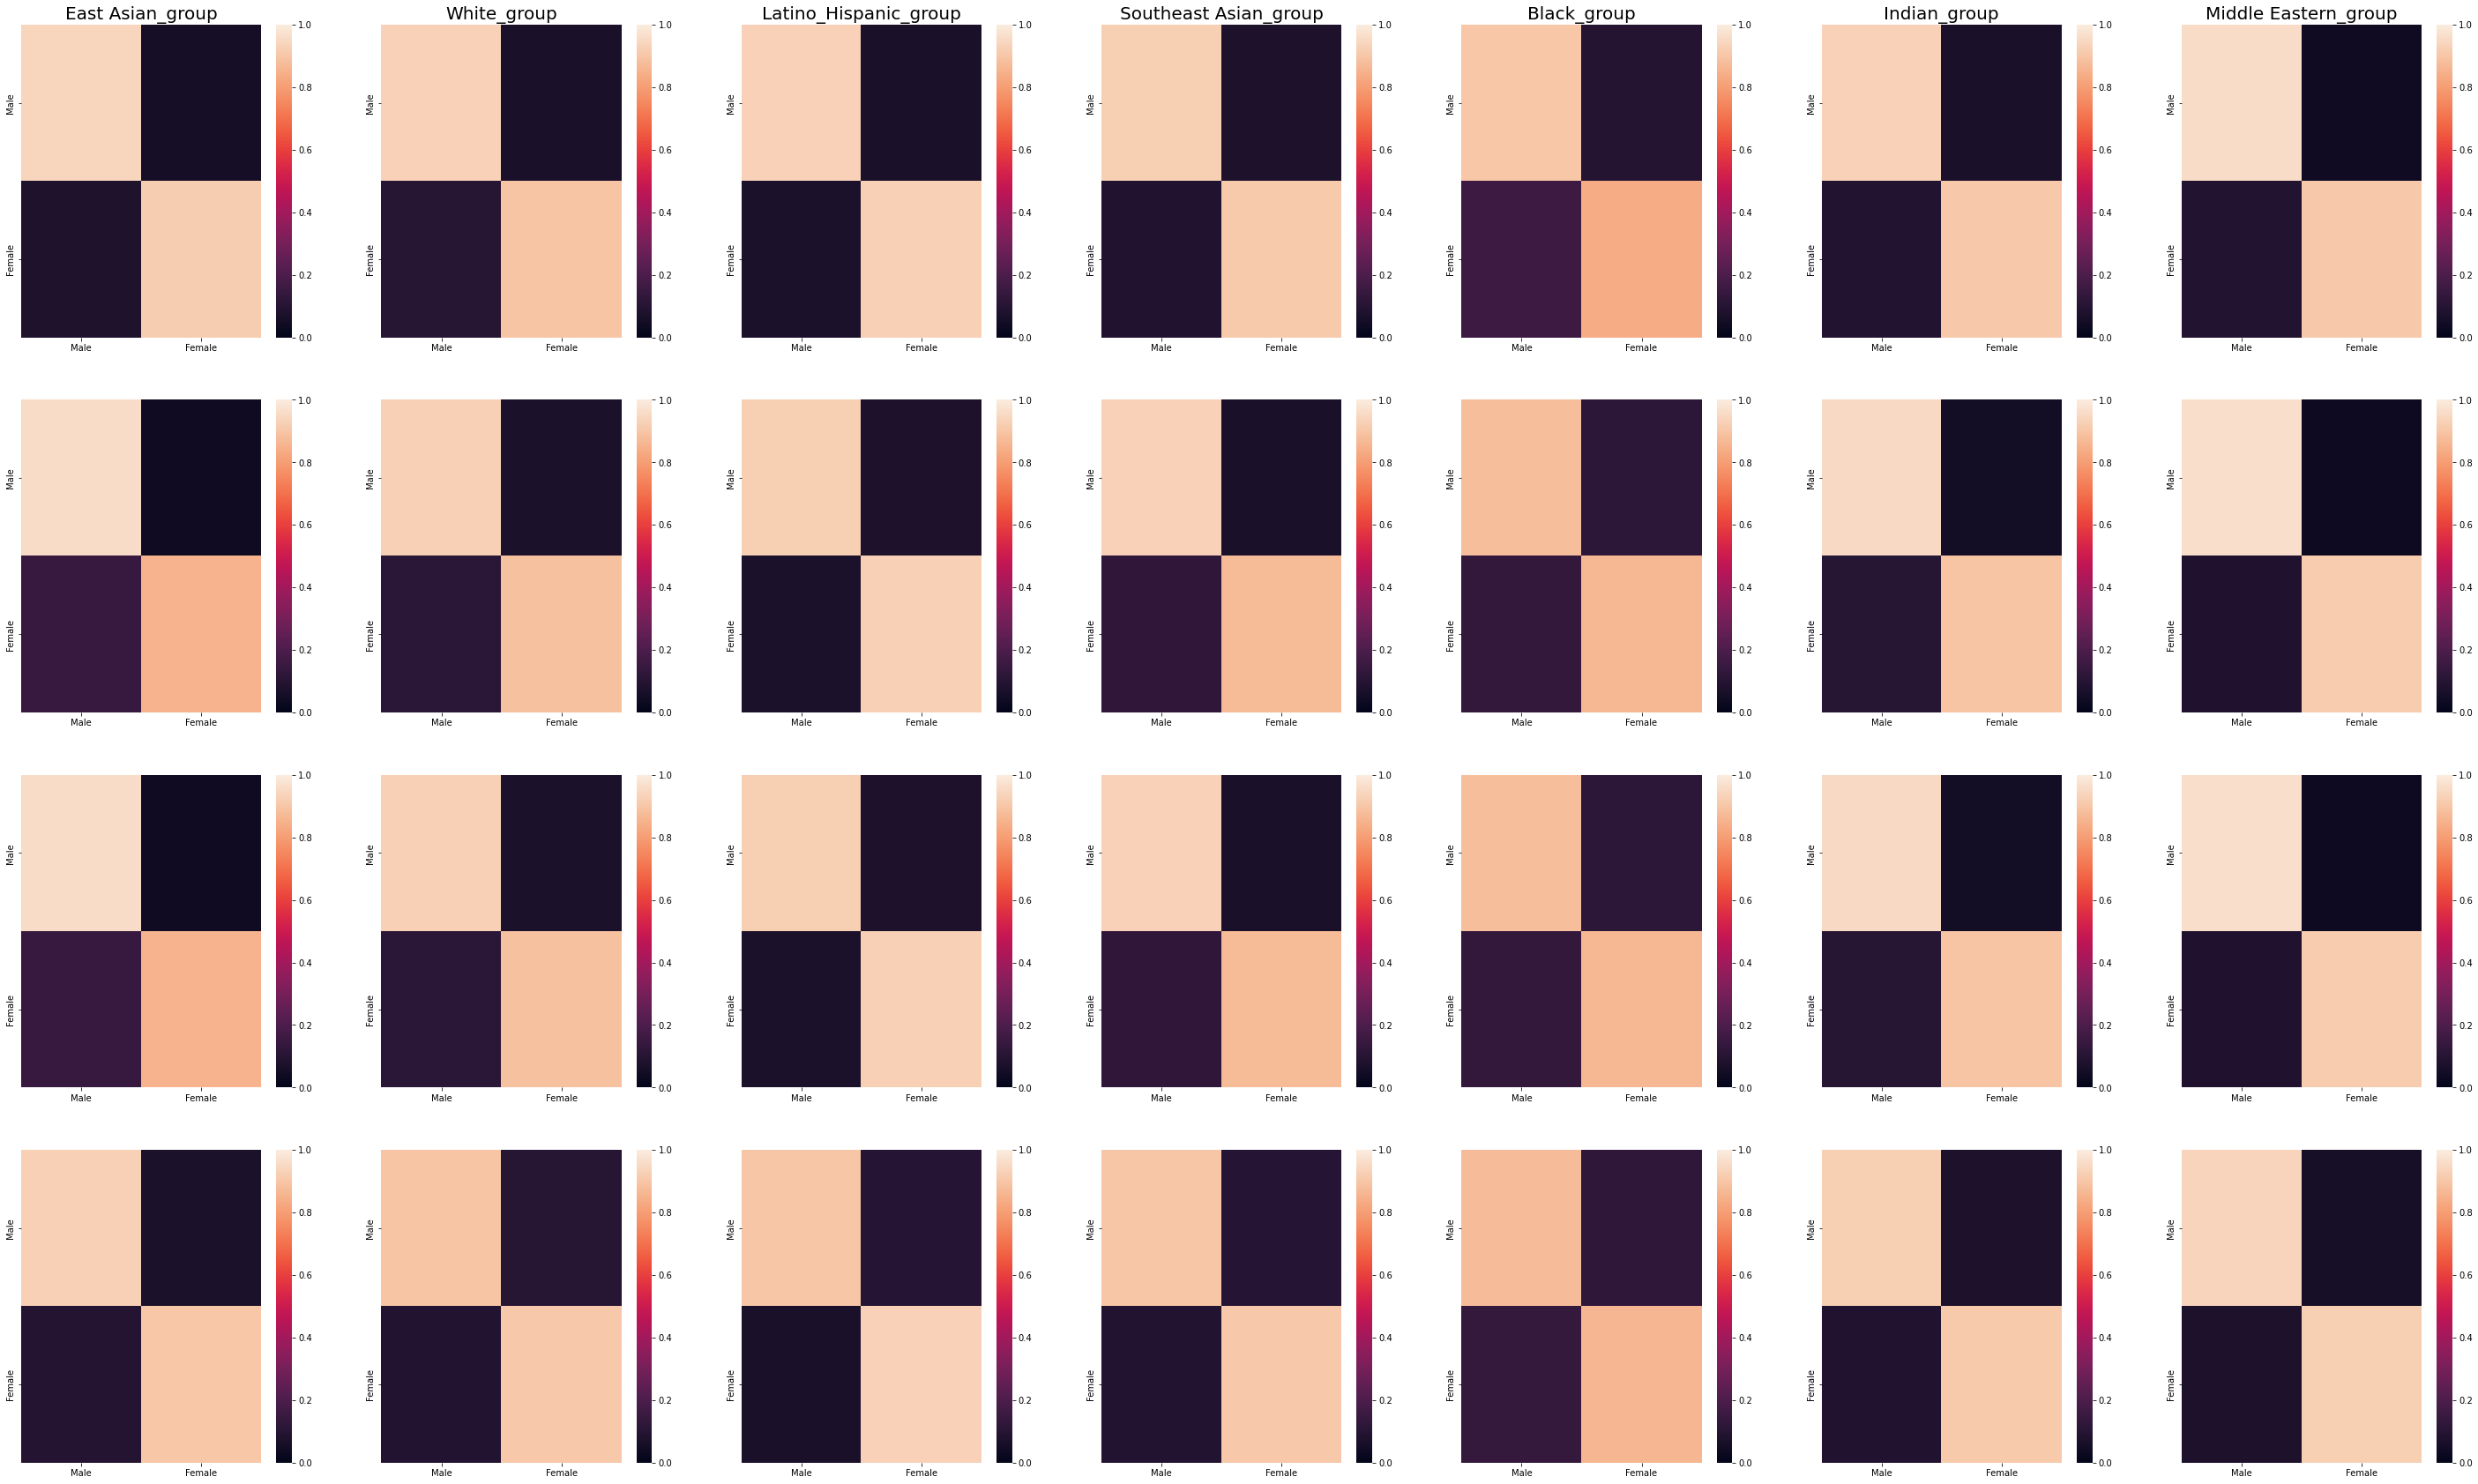

In [ ]:
import pdb
import seaborn as sn
import pandas as pd

plt.figure(figsize=(5*10, 2*15))
layers = [3, 7, 11, 13]

def get_confusion(c):
  tmp = []
  for i in range(len(c)):
    g1 = [c[i][0][0]/sum(c[i][0]), c[i][0][1]/sum(c[i][0])]
    g2 = [c[i][1][0]/sum(c[i][1]), c[i][1][1]/sum(c[i][1])]
    tmp.append([g1, g2])
  return np.array(tmp)

races = ['East Asian',
      'White',
      'Latino_Hispanic',
      'Southeast Asian',
      'Black',
      'Indian',
      'Middle Eastern']


for i in range(4):
  con = np.load("confusion_matrix/confusion_{}.npy".format(layers[i]))
  con = get_confusion(con)
  df_cms = []
  for j in range(7):
    df_cms.append(pd.DataFrame(con[j], index = [l for l in ["Male", "Female"]],
                    columns = [m for m in ["Male", "Female"]]))
  for k in range(7):
    if i == 0:
      ax1 = plt.subplot(4, 7, 7*i+k+1), sn.heatmap(df_cms[k], vmax=1, vmin=0), plt.title("{}_group".format(races[k]), fontsize=20)
    else:
      ax1 = plt.subplot(4, 7, 7*i+k+1), sn.heatmap(df_cms[k], vmax=1, vmin=0)

plt.savefig("../17/confusion_matrix_fairface.pdf")